In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/boston.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.shape

(506, 14)

In [5]:
x = data.drop('MEDV', axis=1)
y = data['MEDV']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=0)

x_train.shape, x_test.shape

((354, 13), (152, 13))

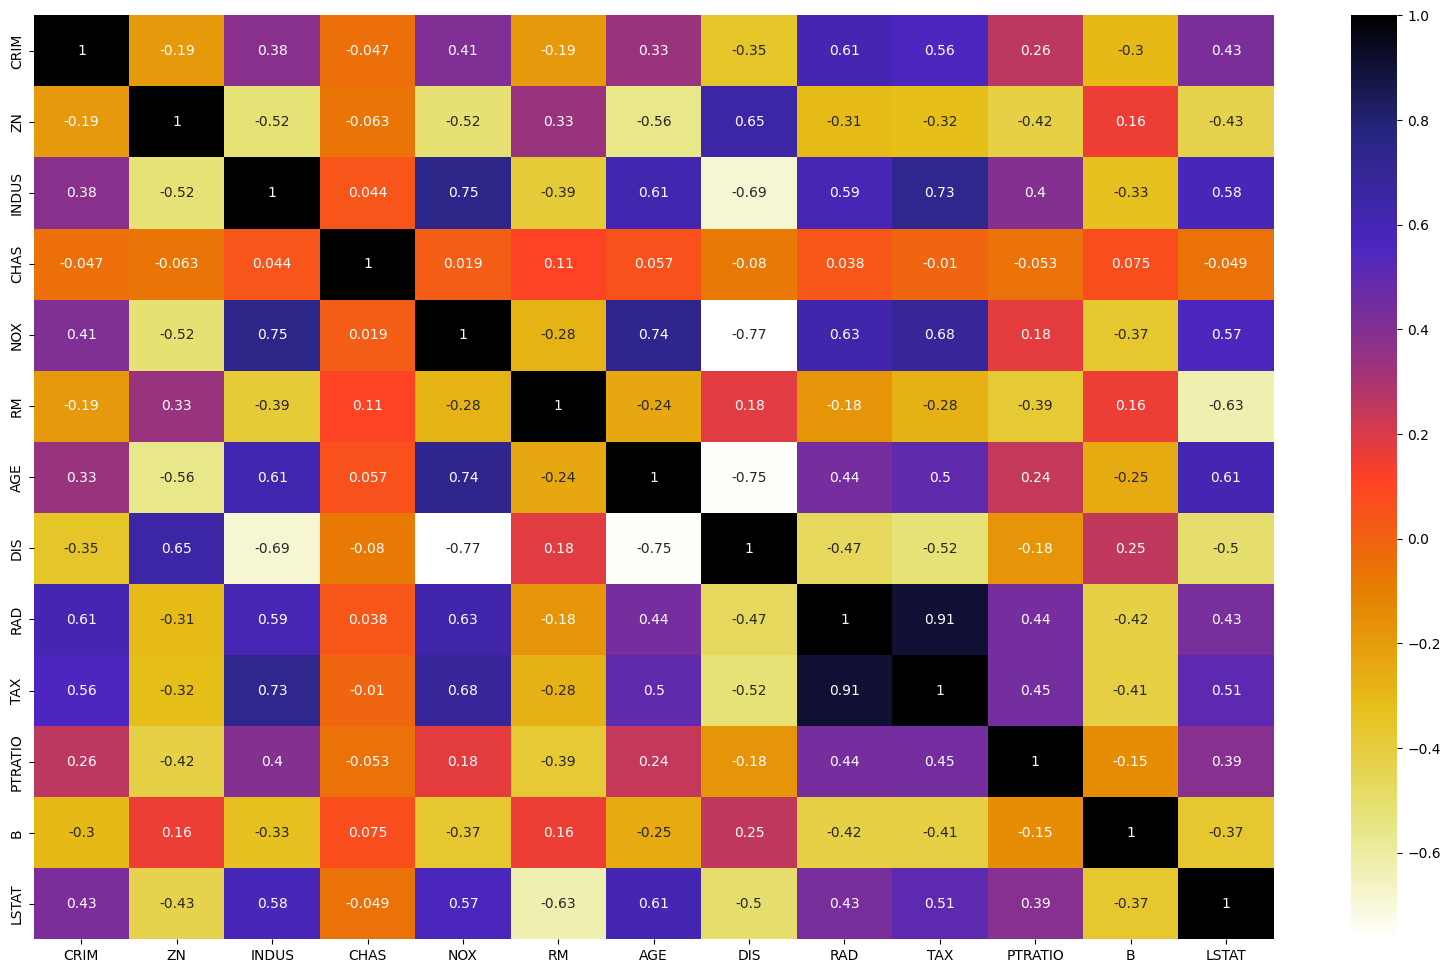

In [8]:
plt.figure(figsize=(20,12))
#Using Pearson Correlation
corr = x_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r);

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()    # Set of all the names of correlated column names
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]   #Getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

4

In [13]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [15]:
x_train.drop(corr_features, axis=1)
x_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,NaN,1.0,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3,18.7,396.90,NaN
428,7.36711,0.0,18.10,0.0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4,18.4,396.90,4.54
